In [5]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
%matplotlib inline


from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import re
import json

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats.stats import pearsonr


from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from IPython.display import display, HTML
from operator import itemgetter
from IPython.display import SVG


In [6]:
district_data=pd.read_csv("./Tea in Tamil Nadu.csv")

In [7]:
district_data.dropna(how='any',axis=0)

,Sl. No.,District,AREA,PRODN.,PTY.
1,2,Coimbatore,11186.0,150340.0,13.00
4,5,Dindigul,3.0,40.0,13.44
7,8,Kanyakumari,202.0,2715.0,13.44
19,20,Theni,1676.0,22525.0,13.00
20,21,The Nilgiris,55779.0,749670.0,13.44
27,28,Tirunelveli,804.0,10806.0,13.44
31,Total,State Total,69650.0,936096.0,13.44


In [8]:
alternate_data=pd.read_csv("./kenya-monthly-tea-production-2012-2016.csv")
alternate_data

,Quantity Produced (Kgs),Year,Month
0,"36,205,286",2012,JANUARY
1,"18,411,613",2012,FEBRUARY
2,"17,858,709",2012,MARCH
3,"18,118,143",2012,APRIL
4,"37,383,207",2012,MAY
5,"30,197,158",2012,JUNE
6,"24,305,781",2012,JULY
7,"31,920,344",2012,AUGUST
8,"33,549,197",2012,SEPTEMBER
9,"40,234,742",2012,OCTOBER


In [9]:
tea_nepal=pd.read_csv("./tea.csv")
tea_nepal

,DISTRICT,AREA,PROD.
0,Jhapa,11557,18732906
1,Ilam,8045,4933682
2,Panchathar,1352,508063
3,Dhankuta,961,184721


In [10]:
tea_export=pd.read_csv("./export_dt.csv")

In [11]:
tea_export

,date,TEA_KOLKATA,OIL
0,2017-09-01,2.610435,52.950000
1,2017-08-01,2.758033,49.943333
2,2017-07-01,2.887943,47.656667
3,2017-06-01,2.839322,46.166667
4,2017-05-01,2.674872,49.893333
...,...,...,...
688,1960-05-01,1.121401,1.630000
689,1960-04-01,1.121401,1.630000
690,1960-03-01,1.121401,1.630000
691,1960-02-01,1.121401,1.630000


In [12]:
crop=pd.read_csv("./crop_production.csv")
crop=crop[crop.Crop.isin(['Tea','Coffee'])]

In [13]:
produce=pd.read_csv("./produce.csv")
produce=produce.drop(axis=1,columns=produce.columns[3:15])

In [14]:
produce

,Particulars,Frequency,Unit,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07,129.3686
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06,135.0120
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24,106.2872
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37,92.0093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,778.00000,669.0000,807.00000,1015.00000,1031.000000,541.000000,1051.000000,1080.000000,1156.00,NaN
425,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,1054.00000,985.0000,1951.00000,1943.00000,2424.000000,2516.000000,2476.000000,3625.000000,2357.00,NaN
426,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,1577.00000,1383.0000,1404.00000,1454.00000,1550.000000,1541.000000,1563.000000,1759.000000,1845.00,NaN
427,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,1222.00000,1188.0000,1318.00000,1319.00000,1280.000000,1160.000000,1328.000000,1320.000000,1360.00,NaN


In [15]:
datafile=pd.read_csv("./datafile (1).csv")
others=datafile[datafile.State.isin(['Tamil Nadu','Andhra Pradesh'])]

In [16]:
datafile.State.unique()

array(['Uttar Pradesh', 'Karnataka', 'Gujarat', 'Andhra Pradesh',
       'Maharashtra', 'Punjab', 'Haryana', 'Rajasthan', 'Madhya Pradesh',
       'Tamil Nadu', 'Bihar', 'Orissa', 'West Bengal'], dtype=object)

In [17]:
croptypes=pd.read_csv("./datafile (2).csv")
croptypes

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8
5,Maize,198.8,249.6,259.8,220.1,286.0,156.1,160.5,161.6,163.4,169.1,127.3,155.5,160.7,134.7,169.1
6,Ragi,56.1,83.6,79.3,73.4,85.2,60.2,70.9,70.6,64.8,65.8,93.2,117.9,112.2,113.2,129.6
7,Small millets,53.9,61.9,50.0,42.9,82.0,50.9,52.3,45.6,41.8,45.0,106.0,118.3,109.7,102.7,182.4
8,Barley,88.1,79.3,112.0,89.9,110.3,72.8,67.9,79.5,70.2,79.4,121.0,116.9,141.0,127.9,138.9
9,Coarse Cereals,138.5,166.4,163.5,137.0,178.4,106.4,105.6,101.8,102.6,105.4,130.1,157.6,160.7,133.5,169.2


In [18]:
croptypes.columns

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [19]:
croptypes.set_index('Crop             ',inplace=True)

In [20]:
d=pd.read_csv("./MEPm.csv")
temp=d[['Tmax','Tmin','W']]

In [21]:
coffee=pd.read_csv('./Global Coffee Consumption:Production.csv')
coffee=coffee[coffee.Country_Name=='India']

In [22]:
from sklearn.decomposition import PCA

In [23]:
coffee

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
31977,711100,"Coffee, Green",IN,India,1961,1960,0,29,Arabica Production,2,(1000 60 KG BAGS),710.0
31978,711100,"Coffee, Green",IN,India,1961,1960,0,90,Bean Exports,2,(1000 60 KG BAGS),527.0
31979,711100,"Coffee, Green",IN,India,1961,1960,0,58,Bean Imports,2,(1000 60 KG BAGS),0.0
31980,711100,"Coffee, Green",IN,India,1961,1960,0,20,Beginning Stocks,2,(1000 60 KG BAGS),436.0
31981,711100,"Coffee, Green",IN,India,1961,1960,0,125,Domestic Consumption,2,(1000 60 KG BAGS),682.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33131,711100,"Coffee, Green",IN,India,2021,2020,6,154,Soluble Dom. Cons.,2,(1000 60 KG BAGS),720.0
33132,711100,"Coffee, Green",IN,India,2021,2020,6,114,Soluble Exports,2,(1000 60 KG BAGS),1950.0
33133,711100,"Coffee, Green",IN,India,2021,2020,6,82,Soluble Imports,2,(1000 60 KG BAGS),70.0
33134,711100,"Coffee, Green",IN,India,2021,2020,6,178,Total Distribution,2,(1000 60 KG BAGS),7005.0


In [24]:
def pca_2d_plot(df,n):
    fig = plt.figure(figsize=(4,4))
    pca = PCA(n_components=n)
    pca.fit(df.values)
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,n+1)])
    sns.lmplot(x='dim1', y='dim2', data=data, size=4, fit_reg=False, scatter_kws={'s':8});
    sns.lmplot(x='dim3', y='dim4', data=data, size=4, fit_reg=False, scatter_kws={'s':8});
    plt.show()

In [25]:
croptypes

,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
Crop,,,,,,,,,,,,,,,
Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8
Maize,198.8,249.6,259.8,220.1,286.0,156.1,160.5,161.6,163.4,169.1,127.3,155.5,160.7,134.7,169.1
Ragi,56.1,83.6,79.3,73.4,85.2,60.2,70.9,70.6,64.8,65.8,93.2,117.9,112.2,113.2,129.6
Small millets,53.9,61.9,50.0,42.9,82.0,50.9,52.3,45.6,41.8,45.0,106.0,118.3,109.7,102.7,182.4
Barley,88.1,79.3,112.0,89.9,110.3,72.8,67.9,79.5,70.2,79.4,121.0,116.9,141.0,127.9,138.9


/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 288x288 with 0 Axes>

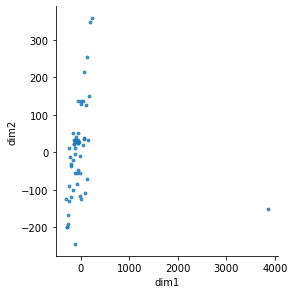

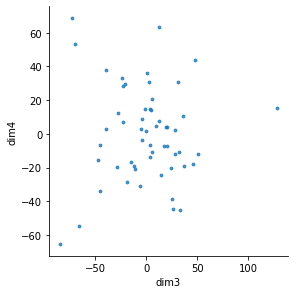

In [26]:
pca_2d_plot(croptypes,15)

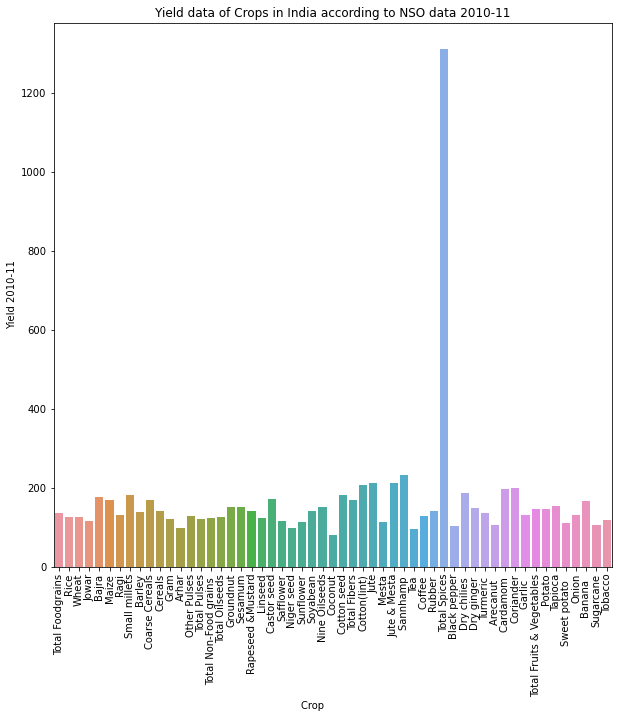

In [27]:
fig,ax=plt.subplots(figsize=(10,10))
sns.barplot(data=croptypes,x=croptypes.index,y='Yield 2010-11',ax=ax)
plt.xticks(rotation='90')
plt.title("Yield data of Crops in India according to NSO data 2010-11")
plt.savefig("./YieldALL")

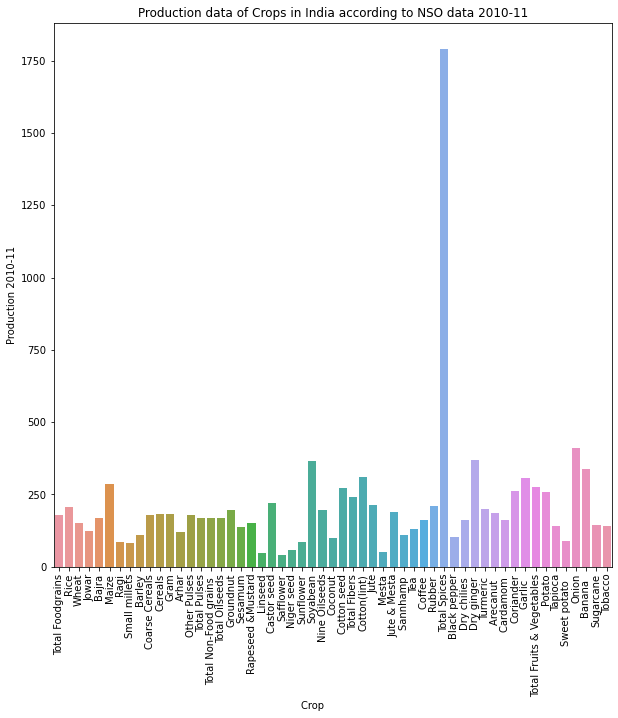

In [28]:
fig,ax=plt.subplots(figsize=(10,10))
sns.barplot(data=croptypes,x=croptypes.index,y='Production 2010-11',ax=ax)
plt.xticks(rotation='90')
plt.title("Production data of Crops in India according to NSO data 2010-11")
plt.savefig("./ProductionALL")

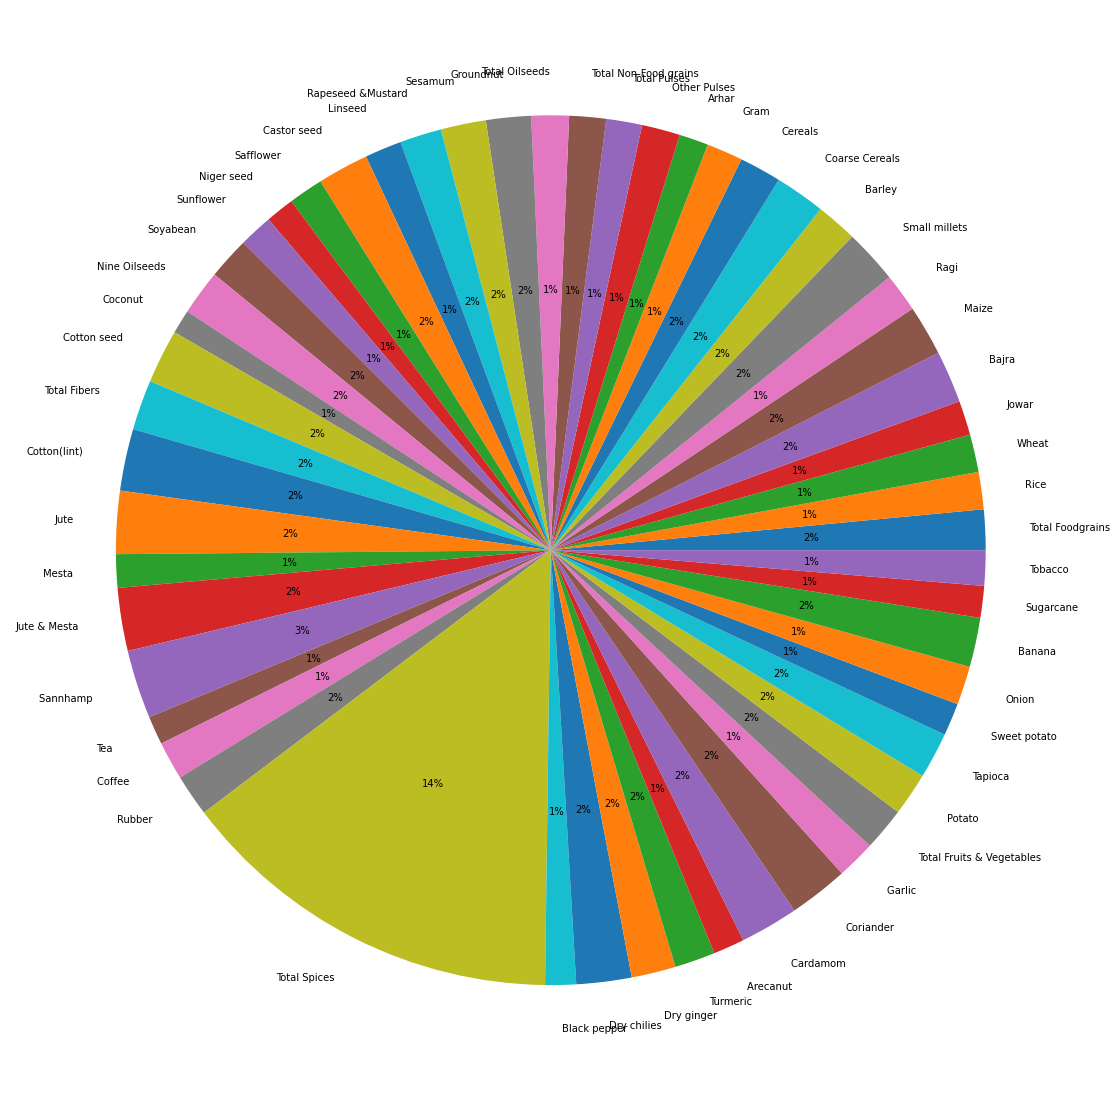

In [29]:
fig,ax=plt.subplots(figsize=(20,20))
plt.pie(croptypes[croptypes.columns[-1]],labels=croptypes.index, autopct='%.0f%%')
plt.yticks(rotation='90')
plt.savefig('./pieALL')

In [30]:
coffee

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
31977,711100,"Coffee, Green",IN,India,1961,1960,0,29,Arabica Production,2,(1000 60 KG BAGS),710.0
31978,711100,"Coffee, Green",IN,India,1961,1960,0,90,Bean Exports,2,(1000 60 KG BAGS),527.0
31979,711100,"Coffee, Green",IN,India,1961,1960,0,58,Bean Imports,2,(1000 60 KG BAGS),0.0
31980,711100,"Coffee, Green",IN,India,1961,1960,0,20,Beginning Stocks,2,(1000 60 KG BAGS),436.0
31981,711100,"Coffee, Green",IN,India,1961,1960,0,125,Domestic Consumption,2,(1000 60 KG BAGS),682.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33131,711100,"Coffee, Green",IN,India,2021,2020,6,154,Soluble Dom. Cons.,2,(1000 60 KG BAGS),720.0
33132,711100,"Coffee, Green",IN,India,2021,2020,6,114,Soluble Exports,2,(1000 60 KG BAGS),1950.0
33133,711100,"Coffee, Green",IN,India,2021,2020,6,82,Soluble Imports,2,(1000 60 KG BAGS),70.0
33134,711100,"Coffee, Green",IN,India,2021,2020,6,178,Total Distribution,2,(1000 60 KG BAGS),7005.0


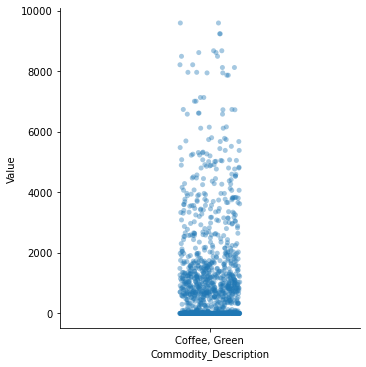

In [31]:
#fig,ax=plt.subplots(figsize=(10,10))
sns.catplot(data=coffee,x='Commodity_Description',y='Value',alpha=0.4)
plt.savefig("./coffeetype")

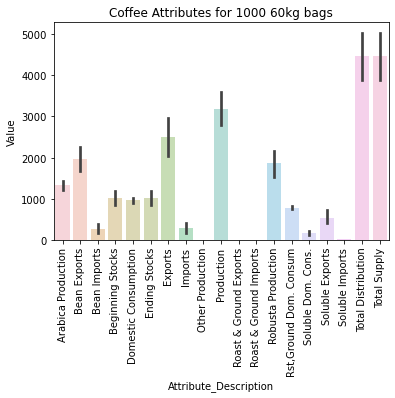

In [32]:
#fig,ax=plt.subplots(figsize=(10,10))
sns.barplot(data=coffee,x='Attribute_Description',y='Value',alpha=0.4)
plt.xticks(rotation='90')
plt.title("Coffee Attributes for 1000 60kg bags")
plt.savefig("./coffeeattributetype")

In [33]:
tea_export['date']=pd.DatetimeIndex(tea_export['date'])

In [34]:
tea_export

,date,TEA_KOLKATA,OIL
0,2017-09-01,2.610435,52.950000
1,2017-08-01,2.758033,49.943333
2,2017-07-01,2.887943,47.656667
3,2017-06-01,2.839322,46.166667
4,2017-05-01,2.674872,49.893333
...,...,...,...
688,1960-05-01,1.121401,1.630000
689,1960-04-01,1.121401,1.630000
690,1960-03-01,1.121401,1.630000
691,1960-02-01,1.121401,1.630000


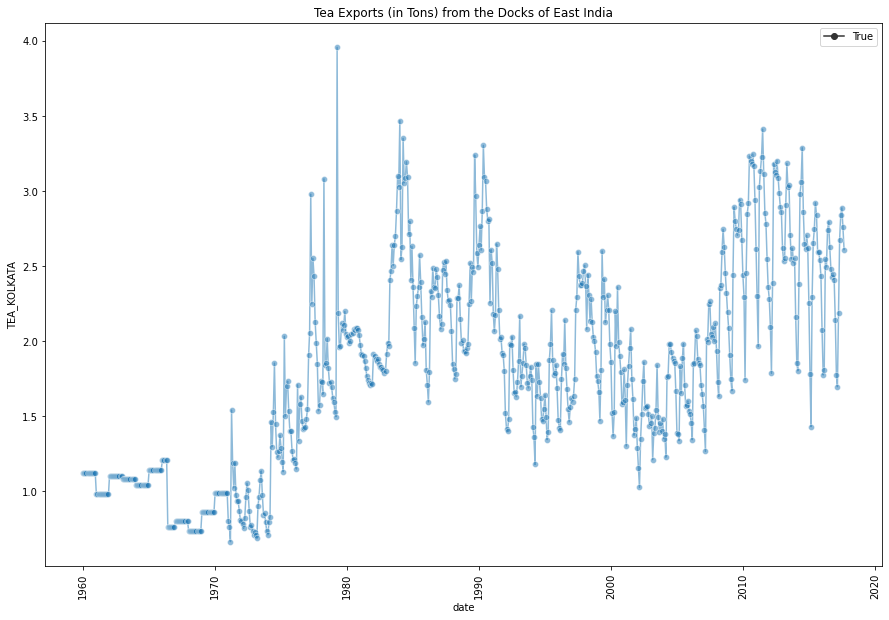

In [35]:
fig,ax=plt.subplots(figsize=(15,10))
sns.lineplot(data=tea_export,x='date',y='TEA_KOLKATA',style=True,markers=True,ax=ax,alpha=0.5)
plt.xticks(rotation='90')
plt.title("Tea Exports (in Tons) from the Docks of East India")
plt.savefig("./ExportKolkata")

In [36]:
district_data=district_data.dropna(how='any',axis=0)
district_data

,Sl. No.,District,AREA,PRODN.,PTY.
1,2,Coimbatore,11186.0,150340.0,13.00
4,5,Dindigul,3.0,40.0,13.44
7,8,Kanyakumari,202.0,2715.0,13.44
19,20,Theni,1676.0,22525.0,13.00
20,21,The Nilgiris,55779.0,749670.0,13.44
27,28,Tirunelveli,804.0,10806.0,13.44
31,Total,State Total,69650.0,936096.0,13.44


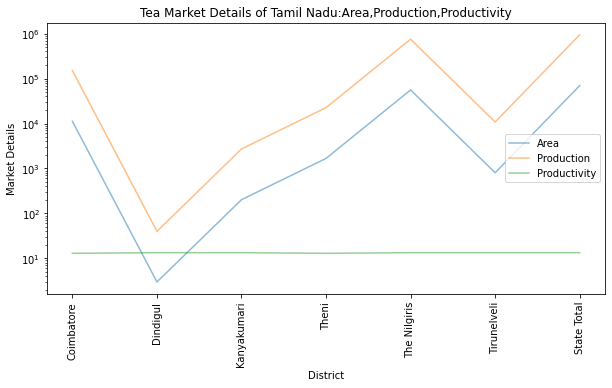

In [37]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=district_data,x='District',y='AREA',markers=True,ax=ax,alpha=0.5,label='Area')
sns.lineplot(data=district_data,x='District',y='PRODN.',markers=True,ax=ax,alpha=0.5,label='Production')
sns.lineplot(data=district_data,x='District',y='PTY.',markers=True,ax=ax,alpha=0.5,label='Productivity')

plt.yscale("log")
plt.ylabel("Market Details")
plt.xticks(rotation='90')
plt.title("Tea Market Details of Tamil Nadu:Area,Production,Productivity")
plt.savefig("./Tamilnadu")

In [38]:
alternate_data.head()

,Quantity Produced (Kgs),Year,Month
0,"36,205,286",2012,JANUARY
1,"18,411,613",2012,FEBRUARY
2,"17,858,709",2012,MARCH
3,"18,118,143",2012,APRIL
4,"37,383,207",2012,MAY


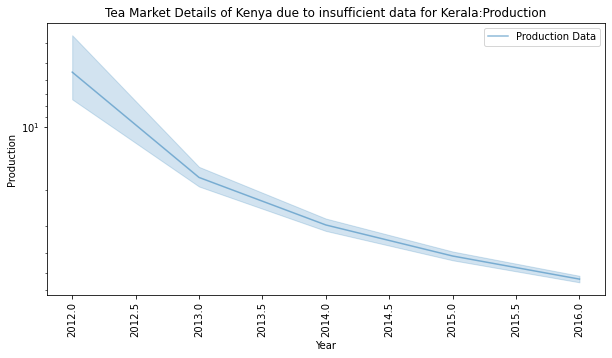

In [39]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=alternate_data,x='Year',y='Quantity Produced (Kgs)',markers=True,ax=ax,alpha=0.5,label='Production Data')

plt.yscale("log")
plt.ylabel("Production")
plt.xticks(rotation='90')
plt.title("Tea Market Details of Kenya due to insufficient data for Kerala:Production")
plt.savefig("./Kerala")

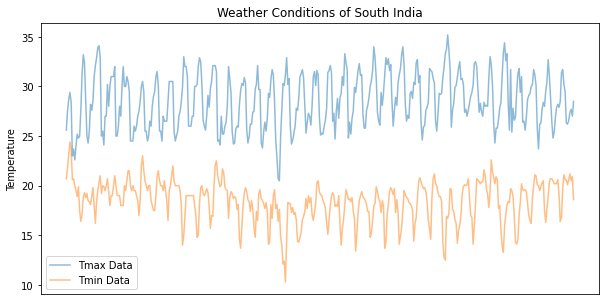

In [40]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(x=temp.index,y=temp['Tmax'],markers=True,ax=ax,alpha=0.5,label='Tmax Data')
sns.lineplot(x=temp.index,y=temp['Tmin'],markers=True,ax=ax,alpha=0.5,label='Tmin Data')
#plt.yscale("log")
plt.ylabel("Temperature")
plt.xticks([])
plt.title("Weather Conditions of South India")
plt.savefig("./Kerala")

1) Importing required libraries and data<br>
2) Simple visualization of the data and few  samples<br>
3) Visualisation via pca and pairplot<br>
4) Checking for dependent variables<br>
5) Outlier detection and handling<br>
6) Cluster analysis: Are there clusters, how many?<br>
7) Clustering and interpretation<br>
8) Deriving conclusions

In [46]:
dom=pd.read_csv("./Global Tea Consumption/domestic-consumption.csv")
dom.head()

,domestic_consumption,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,20.0,30.0,35.0,20.00,25.0,10.0,20.0,40.0,30.0,...,30.000,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
1,Bolivia (Plurinational State of),25.0,27.0,27.5,28.50,29.5,30.5,31.5,32.5,33.0,...,46.000,47.5,49.0,50.5,52.0,53.5,55.0,57.0,58.5,60.0
2,Brazil,8200.0,8500.0,8900.0,9100.00,9300.0,10100.0,11000.0,11500.0,12200.0,...,18390.000,19132.0,19720.0,20330.0,20085.0,20333.0,20508.0,21225.0,21997.0,22250.0
3,Burundi,2.0,1.6,1.7,1.91,2.0,2.0,2.0,2.0,2.0,...,1.399,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,Ecuador,350.0,350.0,350.0,350.00,350.0,350.0,300.0,300.0,300.0,...,150.000,150.0,150.0,150.0,155.0,155.0,155.0,155.0,155.0,155.0


In [48]:
dom.columns

Index(['domestic_consumption', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [88]:
data=[]
for i in dom.columns[1:]:
    data.append(dom[dom.domestic_consumption=='Sri Lanka'][i])

In [89]:
data=pd.DataFrame(data)

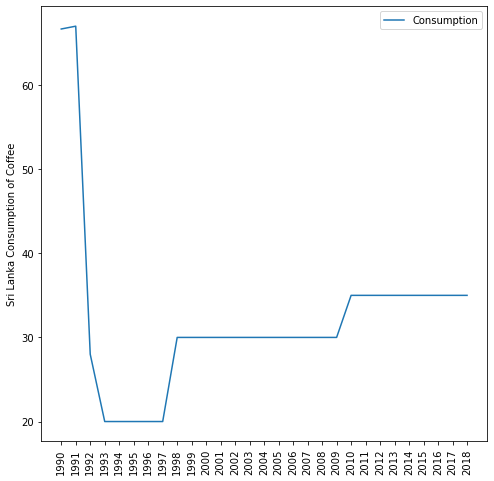

In [90]:
fig,ax=plt.subplots(figsize=(8,8))
sns.lineplot(data=data,x=data.index,y=data.columns[0],markers=True,ax=ax,label='Consumption')
plt.xticks(rotation='90')
plt.ylabel('Sri Lanka Consumption of Coffee')
plt.savefig("./SriLankaConsumption")

In [78]:
exports=pd.read_csv("./Global Tea Consumption/exports-crop-year.csv")
exports

,exports_crop_year,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,79.3450,74.3310,67.5200,27.6080,11.8020,48.1090,50.9250,54.3300,55.3440,...,3.4200,4.9700,8.7150,7.7900,4.9350,9.4050,10.5150,14.8300,5.0060,10.3874
1,Bolivia (Plurinational State of),111.9770,82.9360,100.9350,36.5230,85.9440,110.4850,105.0790,109.2190,100.9850,...,82.4751,69.7249,82.8354,54.7812,67.9122,46.3766,29.2191,20.9835,25.3112,22.5687
2,Brazil,17862.6286,21808.4934,16752.3542,18760.9786,15958.0470,13760.2022,17259.7430,15352.0040,21084.8533,...,30254.8120,34054.4102,32148.8289,29283.0012,32751.9664,37781.7669,37472.5876,33491.1784,30782.8635,37613.8836
3,Burundi,412.3930,762.4910,671.6460,352.8700,580.1270,464.0700,185.6360,546.0340,391.8500,...,172.9370,350.7196,202.1328,405.9615,159.2177,245.5500,274.1017,246.7933,195.1079,179.9206
4,Ecuador,1627.7780,1471.6170,1287.6870,1589.0070,2155.7660,1438.2330,1512.9140,1110.6630,965.9680,...,1156.2849,1273.9798,1553.1144,1578.4024,1209.5450,1089.0112,839.4926,889.8845,643.5744,446.0001
5,Indonesia,6720.3830,5584.1960,5115.4780,5302.2880,4225.8780,4349.7620,6772.4670,5508.5270,5719.2390,...,7989.6699,5647.5118,3644.9233,8970.0386,8700.9493,6679.2773,7985.4751,6891.0266,7761.3153,4717.5942
6,Madagascar,726.4470,679.2130,719.6510,521.3590,474.5390,631.9760,667.3740,433.4710,822.6660,...,44.9613,88.7233,134.8528,89.7094,174.4758,111.4544,55.2061,60.8227,43.7848,21.3764
7,Malawi,103.6280,122.2860,129.1610,75.1110,87.1120,81.2350,57.6500,57.8200,62.3210,...,15.9220,15.9285,24.8264,21.8262,26.7944,23.7098,20.2015,18.5160,13.4703,11.8493
8,Papua New Guinea,1012.8410,794.8160,943.1110,1028.4810,1135.1590,999.8630,1082.3480,1078.7210,1341.7850,...,1048.9942,880.0884,1417.6185,714.7770,833.3204,795.6402,710.1818,1169.1449,731.9382,928.3690
9,Paraguay,168.6270,84.6530,49.2910,55.0460,37.6890,14.8430,15.5630,8.3790,42.3470,...,0.0167,0.1965,0.0195,0.0065,0.0069,0.0725,0.0000,0.0101,0.0024,0.0135


In [84]:
data=[]
for i in exports.columns[1:]:
    data.append(exports[exports.exports_crop_year=='Sri Lanka'][i])
data=pd.DataFrame(data)

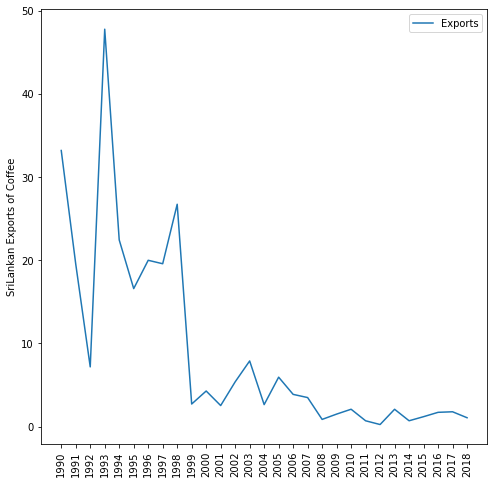

In [85]:
fig,ax=plt.subplots(figsize=(8,8))
sns.lineplot(data=data,x=data.index,y=data.columns[0],markers=True,ax=ax,label='Exports')
plt.xticks(rotation='90')
plt.ylabel('SriLankan Exports of Coffee')
plt.savefig("./SriLankanExports")

In [91]:
gross=pd.read_csv("./Global Tea Consumption/gross-opening-stocks.csv")
gross

,gross_opening_stocks,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,210.000,161.000,136.000,111.000,96.000,36.000,40.000,40.000,10.000,...,40.000,20.000,20.000,10.000,5.000,5.000,5.000,5.000,5.000,5.0
1,Bolivia (Plurinational State of),54.000,39.800,33.400,25.200,11.000,12.500,14.000,2.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2,Brazil,26926.000,25548.000,22625.000,28921.000,29227.000,32161.000,26361.000,27298.000,26594.000,...,15766.000,11098.000,13340.000,10063.000,15868.000,17720.000,12910.000,7800.000,9872.000,9832.0
3,Burundi,77.000,150.000,53.108,0.000,38.574,120.590,88.500,301.833,3.584,...,40.465,6.742,7.000,7.000,5.000,7.000,7.000,5.000,5.000,10.0
4,Ecuador,723.963,250.000,552.207,100.000,230.000,100.000,200.000,380.000,160.000,...,8.000,12.000,10.000,2.300,2.000,3.000,3.000,3.000,3.000,3.0
5,Indonesia,1319.000,798.000,2427.000,1562.000,1644.000,1386.000,166.667,128.784,709.035,...,668.000,725.000,873.000,450.000,650.000,600.000,450.000,500.000,500.000,400.0
6,Madagascar,544.000,450.000,403.300,455.333,15.833,16.000,2.033,16.667,40.000,...,111.000,56.000,30.000,30.000,10.000,10.000,10.000,10.000,10.000,10.0
7,Malawi,20.000,19.000,19.000,25.000,10.000,5.000,13.000,2.000,3.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
8,Papua New Guinea,199.000,146.000,95.000,49.000,38.000,39.500,40.000,45.000,38.300,...,38.000,25.000,10.000,5.000,5.000,5.000,5.000,5.000,5.000,5.0
9,Paraguay,188.000,135.000,115.000,105.000,100.000,67.000,55.000,45.000,40.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0


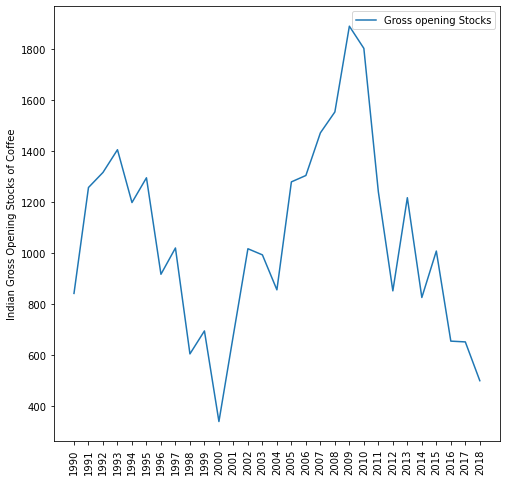

In [93]:
data=[]
for i in gross.columns[1:]:
    data.append(gross[gross.gross_opening_stocks=='India'][i])
data=pd.DataFrame(data)
fig,ax=plt.subplots(figsize=(8,8))
sns.lineplot(data=data,x=data.index,y=data.columns[0],markers=True,ax=ax,label='Gross opening Stocks')
plt.xticks(rotation='90')
plt.ylabel('Indian Gross Opening Stocks of Coffee')
plt.savefig("./IndianGrossOpening")

In [94]:
prices=pd.read_csv("./Global Tea Consumption/prices-paid-to-growers.csv")
prices

,prices_paid_to_growers,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Colombia,1.534724,1.481790,1.204656,1.106477,1.898327,2.199185,2.065245,2.939673,2.253433,...,3.067442,3.985616,5.290868,3.679737,2.514539,3.525662,2.635854,2.727530,2.776185,2.505914
1,Dominican Republic,1.458168,1.382845,1.027841,1.172704,2.478234,2.412000,1.935342,3.673587,2.102616,...,2.340731,3.071276,4.217812,3.262839,3.112084,4.052172,3.775011,3.911395,3.826974,3.391053
2,El Salvador,1.116194,0.983322,0.682322,0.780397,2.191177,2.218826,1.656073,2.762552,1.877384,...,1.748205,2.425620,4.122256,2.651658,2.103276,2.582929,1.930439,1.976442,1.934159,1.645300
3,Guatemala,1.204956,1.270086,0.888099,0.914552,1.662711,2.192936,1.849170,2.146819,2.261521,...,2.420375,3.195830,4.689066,3.664007,2.804848,3.373810,3.073230,2.990444,2.960790,2.697022
4,Honduras,1.111470,1.238947,0.886057,0.828746,1.800576,2.263781,1.493616,2.580166,2.058671,...,1.848015,2.762887,4.415430,3.115841,2.247159,2.625614,2.449565,2.056691,2.003671,1.855291
5,India,1.473558,1.358371,1.191159,1.278669,1.730810,1.870104,1.728881,2.873698,2.195885,...,3.021792,3.335051,5.043230,3.575634,2.584011,3.877464,3.467918,2.918461,2.996744,2.430896
6,Uganda,0.337598,0.654322,0.441397,0.552298,1.666651,1.506821,1.169927,1.772936,1.738302,...,1.336532,1.925611,3.245623,2.068040,1.545905,2.289245,1.794042,1.569419,1.699698,1.506691
7,Brazil,1.199223,0.971150,0.997768,1.167263,2.529110,2.550172,2.126834,3.209923,2.323380,...,2.225150,2.957956,4.950552,3.361764,2.254700,2.973442,2.306547,2.380366,2.438757,2.003980
8,Ethiopia,1.348565,1.505322,1.351128,1.362442,2.418234,2.539011,1.495287,2.010060,2.027901,...,1.701150,1.886530,3.211088,2.269088,1.618110,1.837430,1.678360,1.927316,1.799278,1.560234
9,Brazil,0.769285,0.606947,0.609155,0.784638,1.885786,2.152316,1.540377,1.718671,1.716276,...,1.620826,1.638355,2.324366,2.304737,1.882698,1.791693,1.623110,2.048073,2.168022,1.488327


In [95]:
data=[]
for i in prices.columns[1:]:
    data.append(prices[prices.prices_paid_to_growers=='India'][i])
data=pd.DataFrame(data)

In [96]:
data

,5,10
1990,1.473558,0.978921
1991,1.358371,0.897289
1992,1.191159,0.877945
1993,1.278669,0.975912
1994,1.730810,1.246437
1995,1.870104,1.468722
1996,1.728881,1.251075
1997,2.873698,1.684362
1998,2.195885,1.669311
1999,1.488691,1.271691


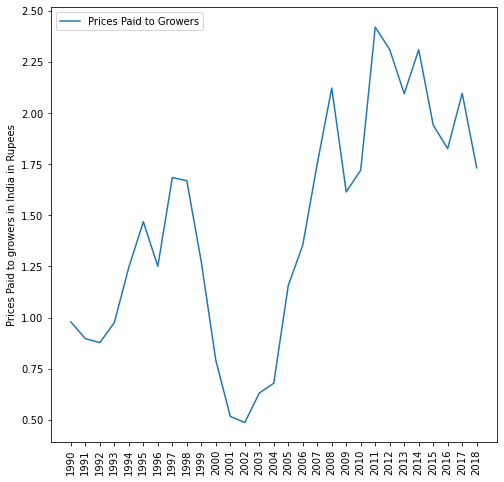

In [98]:
fig,ax=plt.subplots(figsize=(8,8))
sns.lineplot(data=data,x=data.index,y=data.columns[1],markers=True,ax=ax,label='Prices Paid to Growers')
plt.xticks(rotation='90')
plt.ylabel('Prices Paid to growers in India in Rupees')
plt.savefig("./IndianPricesPaid2")

In [99]:
prod=pd.read_csv("./Global Tea Consumption/total-production.csv")
prod

,total_production,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001
5,Indonesia,7441.3830,8493.1960,5569.4780,6743.2880,5367.878,4573.4290,8220.584,7620.778,7295.9550,...,11379.6699,9128.5118,6888.9233,13070.0386,12900.9493,10946.2773,12585.4751,11541.0266,10852.3153,9417.5942
6,Madagascar,982.4470,932.5130,1121.6840,441.8590,641.372,785.0090,849.008,623.804,991.7990,...,456.9613,529.7233,584.8528,499.7094,584.4758,501.4544,425.2061,420.8227,408.7848,396.3764
7,Malawi,104.6280,124.2860,137.1610,62.1110,84.112,91.2350,48.650,60.820,64.3210,...,16.9220,16.9285,25.8264,22.8262,27.7944,24.7098,21.2015,19.5160,14.4703,12.8493
8,Papua New Guinea,962.8410,746.8160,900.1110,1019.4810,1138.659,1002.3630,1089.348,1074.021,1352.1490,...,1037.9942,866.5184,1413.8545,716.4880,835.3594,797.5642,711.9818,1171.1449,733.9382,930.3690
9,Paraguay,130.6270,79.6530,54.2910,70.0460,24.689,22.8430,25.563,23.379,58.3470,...,20.0167,20.1965,20.0195,20.0065,20.0069,20.0725,20.0000,20.0101,20.0024,20.0135


In [100]:
data=[]
for i in prod.columns[1:]:
    data.append(prod[prod.total_production=='India'][i])
data=pd.DataFrame(data)

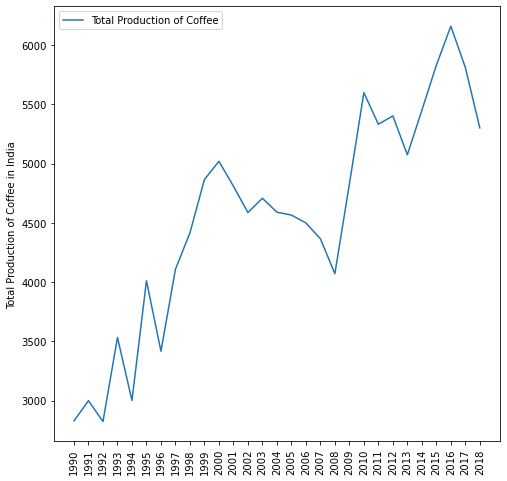

In [103]:
fig,ax=plt.subplots(figsize=(8,8))
sns.lineplot(data=data,x=data.index,y=data.columns[0],markers=True,ax=ax,label='Total Production of Coffee')
plt.xticks(rotation='90')
plt.ylabel('Total Production of Coffee in India')
plt.savefig("./IndianCoffeProduction")

## Clustering Data 

In [148]:
df=pd.read_csv("./daily_wholesale_price_TeaLoose_upto_apr_2015.csv")
df.head()

,Date,Centre_Name,Commodity_Name,Price
0,01-01-09,CHANDIGARH,Tea Loose,NaN
1,01-01-09,DELHI,Tea Loose,12500.0
2,01-01-09,SHIMLA,Tea Loose,NaN
3,01-01-09,SRINAGAR,Tea Loose,NaN
4,01-01-09,JAMMU,Tea Loose,NaN


In [155]:
df['Date']=pd.to_datetime(df['Date'])

In [157]:
df['year']=df['Date'].dt.year

In [149]:
df2=pd.read_csv("./weekly_wholesale_price_tea_loose_upto_2012.csv")
df2.head()

,Date,zone,centre,tea_loose
0,06-01-93,1,HISAR,5600.0
1,06-01-93,1,KARNAL,5200.0
2,06-01-93,1,SHIMLA,5900.0
3,06-01-93,1,MANDI,NaN
4,06-01-93,1,SRINAGAR,NaN


In [159]:
df2.rename(columns={'centre':'Centre_Name'},inplace=True)

In [158]:
df2['Date']=pd.to_datetime(df2['Date'])
df2['year']=df2['Date'].dt.year

In [160]:
df=df.merge(df2,how='inner',on=['Date','Centre_Name'])

In [161]:
df

,Date,Centre_Name,Commodity_Name,Price,year_x,zone,tea_loose,year_y
0,2009-07-01,CHANDIGARH,Tea Loose,12500.0,2009,1,19500.00,2009
1,2009-07-01,DELHI,Tea Loose,12500.0,2009,1,12500.00,2009
2,2009-07-01,SHIMLA,Tea Loose,12500.0,2009,1,9500.00,2009
3,2009-07-01,SRINAGAR,Tea Loose,12500.0,2009,1,73200.00,2009
4,2009-07-01,JAMMU,Tea Loose,12500.0,2009,1,45850.00,2009
...,...,...,...,...,...,...,...,...
4377,2012-11-07,SHILLONG,Tea Loose,14480.0,2012,3,18093.75,2012
4378,2012-11-07,AGARTALA,Tea Loose,13250.0,2012,3,13250.00,2012
4379,2012-11-07,ERNAKULAM,Tea Loose,12300.0,2012,4,12300.00,2012
4380,2012-11-07,CHENNAI,Tea Loose,17975.0,2012,4,12300.00,2012


In [166]:
df['tea_loose']=df['tea_loose'].interpolate(method='linear',limit_direction='forward')

In [167]:
df['Price']=df['Price'].interpolate(method ='linear', limit_direction ='forward')

In [168]:
df['Price']=df['Price'].fillna(0)

In [169]:
df.drop(['Date','Commodity_Name','zone','year_x'],axis=1,inplace=True)

In [170]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [171]:
X=df.drop('Centre_Name',axis=1)
y=df['Centre_Name']


In [172]:
centres=df['Centre_Name'].unique()

In [175]:
y

0        0
1        1
2        2
3        3
4        4
        ..
4377    16
4378    17
4379    29
4380    18
4381    19
Name: Centre_Name, Length: 4382, dtype: object

In [176]:
X = scaler.fit_transform(pd.DataFrame(X).values)

In [177]:
X

array([[-0.46070182,  0.44722668, -1.40580801],
       [-0.46070182, -0.35384732, -1.40580801],
       [-0.46070182, -0.69716475, -1.40580801],
       ...,
       [-0.51200218, -0.37673515,  1.45321923],
       [ 0.94364573, -0.37673515,  1.45321923],
       [ 0.92440809,  0.26412405,  1.45321923]])

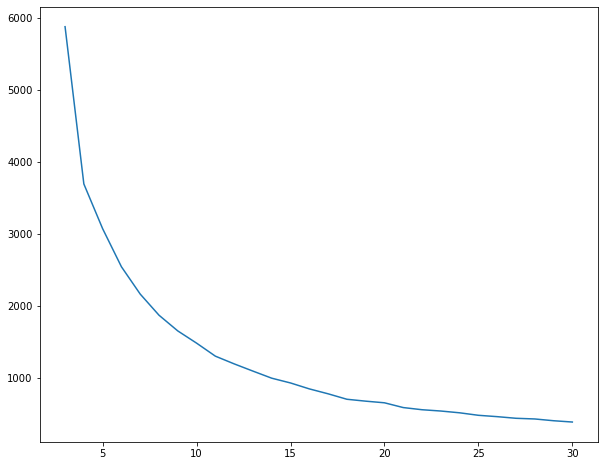

In [178]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

In [179]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

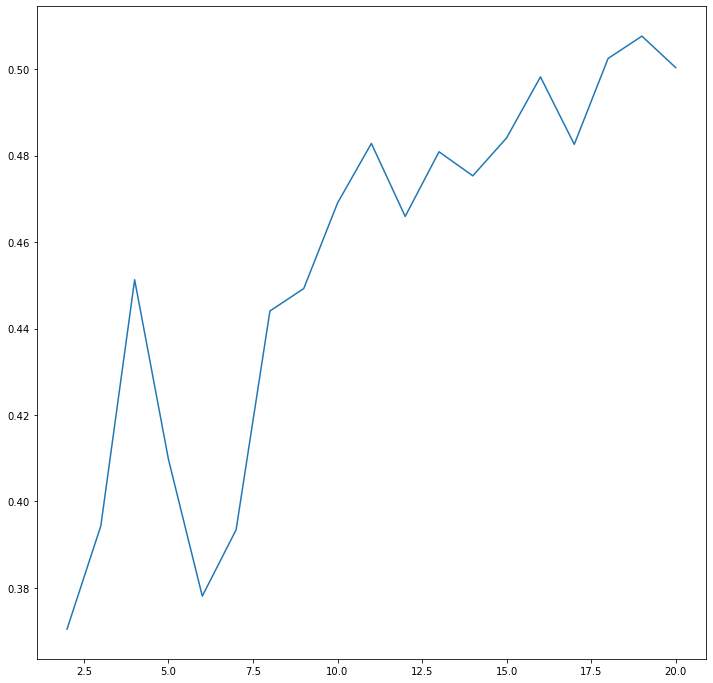

In [180]:
plot_silhoutte_score(X,20)

In [181]:
def under_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    ks = range(1,k_max+1)
    UPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        UPM.append(kmeans.inertia_)
    return UPM
def over_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import  pairwise_distances
    ks = range(1,k_max+1)
    OPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        d_min = np.inf
        for pair in list(itertools.combinations(centers, 2)):
            d = pairwise_distances(pair[0].reshape(1,-1), pair[1].reshape(1,-1), metric='euclidean')
            if d<d_min:
                d_min = d
        OPM.append(k/d_min)
    return OPM

In [189]:
def validity_index(X, k_max):
    UPM = under_partition_measure(X, k_max)
    OPM = over_partition_measure(X, k_max)
    UPM_min = np.min(UPM)
    OPM_min = np.min(OPM)
    UPM_max = np.max(UPM)
    OPM_max = np.max(OPM)
    norm_UPM = []
    norm_OPM = []
    for i in range(k_max):
        norm_UPM.append((UPM[i]-UPM_min)/(UPM_max-UPM_min))
        norm_OPM.append((OPM[i]-OPM_min)/(OPM_max-OPM_min))
        
    validity_index = np.mean(np.array(norm_UPM)+np.array(norm_OPM),axis=1)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(range(1,k_max+1), validity_index)
    return validity_index

In [184]:
import itertools

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


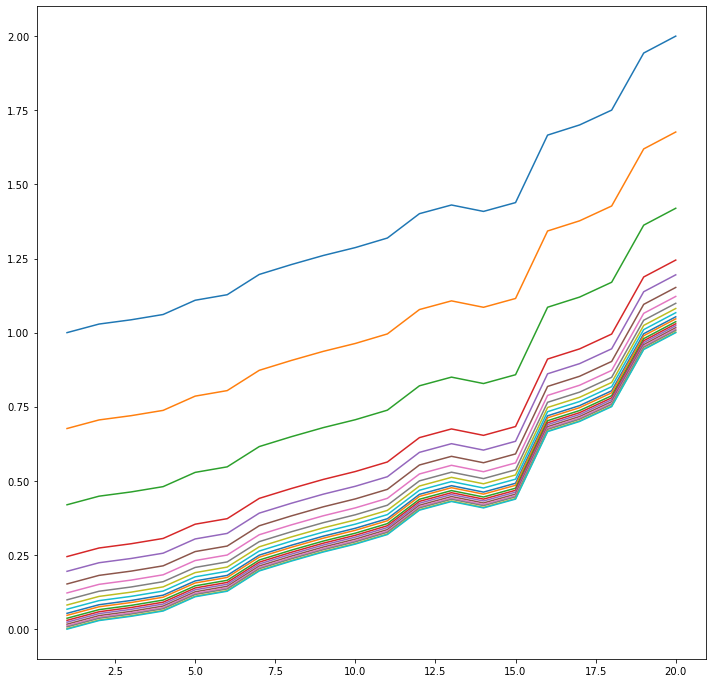

In [190]:
_ = validity_index(X, 20)

In [192]:
kmeans_10 = KMeans(n_clusters=10, random_state=42)
kmeans_10.fit(X)
df['labels'] = kmeans_10.predict(X)

In [194]:
df[df['labels']==0].head(10)

,Centre_Name,Price,tea_loose,year_y,labels
3537,1,15000.0,15000.0,2012,0
3538,22,13000.0,13000.0,2012,0
3539,23,13000.0,13000.0,2012,0
3540,2,12000.0,12000.0,2012,0
3541,24,12550.0,12550.0,2012,0
3542,3,13100.0,13100.0,2012,0
3543,4,13650.0,13650.0,2012,0
3544,5,14200.0,14200.0,2012,0
3547,20,12500.0,12500.0,2012,0
3551,25,13700.0,13700.0,2012,0


In [195]:
df[df['labels']==0].describe()

,Price,tea_loose,year_y,labels
count,549.000000,549.000000,549.0,549.0
mean,13346.512866,13328.585509,2012.0,0.0
std,1576.306652,1793.474222,0.0,0.0
min,9000.000000,9000.000000,2012.0,0.0
25%,12500.000000,12100.000000,2012.0,0.0
50%,13250.000000,13166.666667,2012.0,0.0
75%,14500.000000,14500.000000,2012.0,0.0
max,16000.000000,20031.250000,2012.0,0.0
